##### 1. K-fold 교차 검증

In [5]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# 숫자 데이터셋을 로드
digits = datasets.load_digits()

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

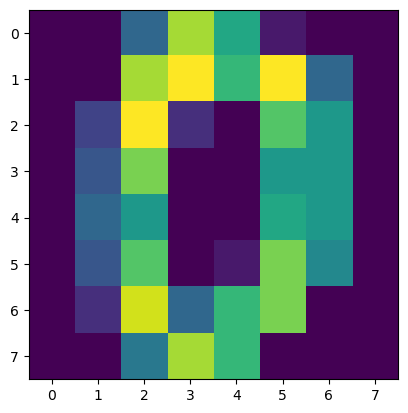

In [7]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8))
plt.show()

In [8]:
# 특성 행렬
features = digits.data
target = digits.target
# 표준화 객체
standardizer = StandardScaler()
# 로지스틱 회귀 객체
logit = LogisticRegression()
# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인(작업순서)
#                      평균0/표준편차1  분류모형
pipeline = make_pipeline(standardizer, logit)
# k-폴드 교차검증
kf = KFold(n_splits=10, shuffle=True, random_state=1)
           # k-폴드 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 평균을 계산
cv_results.mean()

0.9693916821849783

In [9]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [11]:
cv_results.max() 

0.9888888888888889

##### 2. ShuffleSplit
- 반복횟수에 관계없이 학습용, 검증용 데이터 셋을 임의로 지정할 수 있음
- 반복마다 랜덤하게 분할하므로 하나의 샘플이 여러번 포함될 수 있음

In [3]:
from sklearn.model_selection import ShuffleSplit
# ShuffleSplit 분할기(학습용 50%, 검증용 20%)
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)
pipeline=make_pipeline(standardizer, logit)
# 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 평균을 계산
cv_results.mean()

0.9630555555555554

##### 3. RepeatedKFold 교차검증

In [4]:
from sklearn.model_selection import RepeatedKFold
# RepeatedKFold 분할기(10회 교차검증을 5회 반복)
rk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
# 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 검증 점수 개수를 확인
print(len(cv_results))
# 평균을 계산
print(cv_results.mean())

50
0.9695065176908755


##### 4. 하이퍼파라미터 값의 영향을 시각화하기

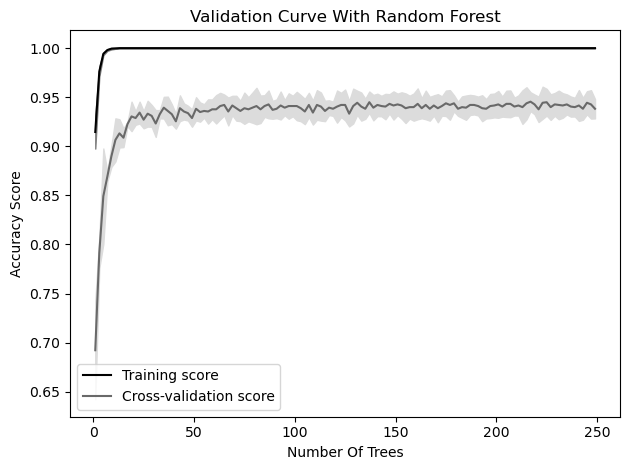

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터를 로드
digits = load_digits()

# 특성 행렬과 타깃 벡터
features, target = digits.data, digits.target

# 파라미터 값의 범위
param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 학습용 데이터셋과 검증용 데이터셋의 정확도를 계산
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), features, target,
    param_name="n_estimators", param_range=param_range,
    cv=3, scoring="accuracy", n_jobs=-1)

# 학습용 데이터셋 점수의 평균과 표준 편차를 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 검증용 데이터셋 점수의 평균과 표준 편차를 계산
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 학습용 데이터셋과 검증용 데이터셋의 평균 정확도 점수
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 학습용 데이터셋과 검증용 데이터셋의 정확도에 대한 표준 편차 그래프
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# 그래프를 출력
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()